# Image Processing Assignment 2

We start with importing the necessary libraries

In [5]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

##### 1. Compute the 1D basis vectors for a 4-point DCT. Using these results, compute the 2D basis vectors C(i, j) for a 4*4 DCT.

Code for discrete cosine transform basis - 1d and 2d

In [6]:
def dct1d(N):
  dct_d = np.zeros([N, N])

  for k in range(N):
    for n in range(N):
      dct_d[k, n] = np.cos(np.pi*((n+0.5)/N * k))
  return dct_d

In [7]:
N = 4
dct_d = np.zeros([N, N])
# dct_2d = np.zeros([N, N, N, N])

for k in range(N):
  for n in range(N):
    dct_d[k, n] = np.cos(np.pi*((n+0.5)/N * k))

# for u in range(N):
#   for x in range(N):
#     dct_2d[u, x] = dct_d[u, x] * dct_d
# dct_2d = dct_2d.transpose((0, 2, 1, 3))
# print(dct_2d) #Gives the same answer as the other method


dct_2d = np.zeros([N, N, N, N])
for x in range(N):
  for y in range(N):
    for u in range(N):
      for v in range(N):
        dct_2d[x, y, u, v] = dct_d[x, u] * dct_d[y, v]
print(dct_2d)

[[[[ 1.          1.          1.          1.        ]
   [ 1.          1.          1.          1.        ]
   [ 1.          1.          1.          1.        ]
   [ 1.          1.          1.          1.        ]]

  [[ 0.92387953  0.38268343 -0.38268343 -0.92387953]
   [ 0.92387953  0.38268343 -0.38268343 -0.92387953]
   [ 0.92387953  0.38268343 -0.38268343 -0.92387953]
   [ 0.92387953  0.38268343 -0.38268343 -0.92387953]]

  [[ 0.70710678 -0.70710678 -0.70710678  0.70710678]
   [ 0.70710678 -0.70710678 -0.70710678  0.70710678]
   [ 0.70710678 -0.70710678 -0.70710678  0.70710678]
   [ 0.70710678 -0.70710678 -0.70710678  0.70710678]]

  [[ 0.38268343 -0.92387953  0.92387953 -0.38268343]
   [ 0.38268343 -0.92387953  0.92387953 -0.38268343]
   [ 0.38268343 -0.92387953  0.92387953 -0.38268343]
   [ 0.38268343 -0.92387953  0.92387953 -0.38268343]]]


 [[[ 0.92387953  0.92387953  0.92387953  0.92387953]
   [ 0.38268343  0.38268343  0.38268343  0.38268343]
   [-0.38268343 -0.38268343 -0.38268

##### 2. Repeat the above for Walsh, Hadamard transforms.


Code for Walsh transform basis - 1d and 2d

In [8]:
N = 4
def getBinaries(n):
  binary = [int(x) for x in bin(n)[2:]]
  return [0]*(int(np.log2(N))-len(binary)+1) + binary
G1d = np.zeros([N, N])
for x in range(N):
  for u in range(N):
    bx = getBinaries(x)
    bu = getBinaries(u)
    G1d[x, u] = (-1) ** sum(np.multiply(bx, bu[::-1]))
print(G1d)

[[ 1.  1.  1.  1.]
 [ 1.  1. -1. -1.]
 [ 1. -1.  1. -1.]
 [ 1. -1. -1.  1.]]


In [33]:
def walsh1d(N):
  def getBinaries(n):
    binary = [int(x) for x in bin(n)[2:]]
    return [0]*(int(np.log2(N))-len(binary)+1) + binary
  G1d = np.zeros([N, N])
  for x in range(N):
    for u in range(N):
      bx = getBinaries(x)
      bu = getBinaries(u)
      G1d[x, u] = (-1) ** sum(np.multiply(bx, bu[::-1]))
  return G1d
print(walsh1d(256))

[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1. -1. ... -1.  1.  1.]
 [ 1.  1. -1. ...  1. -1. -1.]
 [ 1.  1. -1. ...  1. -1. -1.]]


In [9]:
G2d = np.zeros([N, N, N, N])

for x in range(N):
  for u in range(N):
    G2d[x, u] = G1d[x, u] * G1d
G2d = G2d.transpose(0, 2, 1, 3)

for x in range(N):
  for y in range(N):
    for u in range(N):
      for v in range(N):
        if G2d[x, y, u, v] != G1d[x, u] * G1d[y, v]:
          print("Wrong")
        G2d[x, y, u, v] = G1d[x, u] * G1d[y, v]
print(G2d)

[[[[ 1.  1.  1.  1.]
   [ 1.  1.  1.  1.]
   [ 1.  1.  1.  1.]
   [ 1.  1.  1.  1.]]

  [[ 1.  1. -1. -1.]
   [ 1.  1. -1. -1.]
   [ 1.  1. -1. -1.]
   [ 1.  1. -1. -1.]]

  [[ 1. -1.  1. -1.]
   [ 1. -1.  1. -1.]
   [ 1. -1.  1. -1.]
   [ 1. -1.  1. -1.]]

  [[ 1. -1. -1.  1.]
   [ 1. -1. -1.  1.]
   [ 1. -1. -1.  1.]
   [ 1. -1. -1.  1.]]]


 [[[ 1.  1.  1.  1.]
   [ 1.  1.  1.  1.]
   [-1. -1. -1. -1.]
   [-1. -1. -1. -1.]]

  [[ 1.  1. -1. -1.]
   [ 1.  1. -1. -1.]
   [-1. -1.  1.  1.]
   [-1. -1.  1.  1.]]

  [[ 1. -1.  1. -1.]
   [ 1. -1.  1. -1.]
   [-1.  1. -1.  1.]
   [-1.  1. -1.  1.]]

  [[ 1. -1. -1.  1.]
   [ 1. -1. -1.  1.]
   [-1.  1.  1. -1.]
   [-1.  1.  1. -1.]]]


 [[[ 1.  1.  1.  1.]
   [-1. -1. -1. -1.]
   [ 1.  1.  1.  1.]
   [-1. -1. -1. -1.]]

  [[ 1.  1. -1. -1.]
   [-1. -1.  1.  1.]
   [ 1.  1. -1. -1.]
   [-1. -1.  1.  1.]]

  [[ 1. -1.  1. -1.]
   [-1.  1. -1.  1.]
   [ 1. -1.  1. -1.]
   [-1.  1. -1.  1.]]

  [[ 1. -1. -1.  1.]
   [-1.  1.  1. -1.]
   [ 1. 

Code for Hadamard transform basis - 1d and 2d

In [10]:
N = 4
def getBinaries(n):
  binary = [int(x) for x in bin(n)[2:]]
  return [0]*(int(np.log2(N))-len(binary)+1) + binary
H1d = np.zeros([N, N])
for x in range(N):
  for u in range(N):
    bx = getBinaries(x)
    bu = getBinaries(u)
    H1d[x, u] = (-1) ** sum(np.multiply(bx, bu))
print(H1d)

[[ 1.  1.  1.  1.]
 [ 1. -1.  1. -1.]
 [ 1.  1. -1. -1.]
 [ 1. -1. -1.  1.]]


In [38]:
def hadamard1d(N):
  def getBinaries(n):
    binary = [int(x) for x in bin(n)[2:]]
    return [0]*(int(np.log2(N))-len(binary)+1) + binary
  H1d = np.zeros([N, N])
  for x in range(N):
    for u in range(N):
      bx = getBinaries(x)
      bu = getBinaries(u)
      H1d[x, u] = (-1) ** sum(np.multiply(bx, bu))
  return H1d

In [11]:
H2d = np.zeros([N, N, N, N])

for x in range(N):
  for u in range(N):
    H2d[x, u] = H1d[x, u] * H1d
H2d = H2d.transpose(0, 2, 1, 3)

for x in range(N):
  for y in range(N):
    for u in range(N):
      for v in range(N):
        if H2d[x, y, u, v] != H1d[x, u] * H1d[y, v]:
          print("Wrong")
        H2d[x, y, u, v] = H1d[x, u] * H1d[y, v]
print(H2d)

[[[[ 1.  1.  1.  1.]
   [ 1.  1.  1.  1.]
   [ 1.  1.  1.  1.]
   [ 1.  1.  1.  1.]]

  [[ 1. -1.  1. -1.]
   [ 1. -1.  1. -1.]
   [ 1. -1.  1. -1.]
   [ 1. -1.  1. -1.]]

  [[ 1.  1. -1. -1.]
   [ 1.  1. -1. -1.]
   [ 1.  1. -1. -1.]
   [ 1.  1. -1. -1.]]

  [[ 1. -1. -1.  1.]
   [ 1. -1. -1.  1.]
   [ 1. -1. -1.  1.]
   [ 1. -1. -1.  1.]]]


 [[[ 1.  1.  1.  1.]
   [-1. -1. -1. -1.]
   [ 1.  1.  1.  1.]
   [-1. -1. -1. -1.]]

  [[ 1. -1.  1. -1.]
   [-1.  1. -1.  1.]
   [ 1. -1.  1. -1.]
   [-1.  1. -1.  1.]]

  [[ 1.  1. -1. -1.]
   [-1. -1.  1.  1.]
   [ 1.  1. -1. -1.]
   [-1. -1.  1.  1.]]

  [[ 1. -1. -1.  1.]
   [-1.  1.  1. -1.]
   [ 1. -1. -1.  1.]
   [-1.  1.  1. -1.]]]


 [[[ 1.  1.  1.  1.]
   [ 1.  1.  1.  1.]
   [-1. -1. -1. -1.]
   [-1. -1. -1. -1.]]

  [[ 1. -1.  1. -1.]
   [ 1. -1.  1. -1.]
   [-1.  1. -1.  1.]
   [-1.  1. -1.  1.]]

  [[ 1.  1. -1. -1.]
   [ 1.  1. -1. -1.]
   [-1. -1.  1.  1.]
   [-1. -1.  1.  1.]]

  [[ 1. -1. -1.  1.]
   [ 1. -1. -1.  1.]
   [-1. 

##### 3. Perform following operations on a sample standard gray level image of size 256*256.
##### (a) Compute the Discrete Fourier Transform.
##### (b) Compute the Discrete Cosine Transform.
##### (c) Compute the Walsh Transform.
##### (d) Compute the Hadamard Transform.
##### Remove some fixed number of transform coefficients and reconstruct the original image. Report your observations.

Code for fourier transform basis and its inverse - 1d

In [45]:
m = 256
fft1d = np.zeros([m, m], dtype=complex)
for u in range(m):
  for x in range(m):
    fft1d[u][x] = np.round(np.exp(-1j*2*np.pi*x*u/m), 10)
print(fft1d)
ifft1d = np.conj(fft1d)

[[1.        +0.j         1.        +0.j         1.        +0.j
  ... 1.        +0.j         1.        +0.j
  1.        +0.j        ]
 [1.        +0.j         0.99969882-0.02454123j 0.99879546-0.04906767j
  ... 0.99729046+0.07356456j 0.99879546+0.04906767j
  0.99969882+0.02454123j]
 [1.        +0.j         0.99879546-0.04906767j 0.99518473-0.09801714j
  ... 0.98917651+0.14673047j 0.99518473+0.09801714j
  0.99879546+0.04906767j]
 ...
 [1.        +0.j         0.99729046+0.07356456j 0.98917651+0.14673047j
  ... 0.97570213-0.21910124j 0.98917651-0.14673047j
  0.99729046-0.07356456j]
 [1.        +0.j         0.99879546+0.04906767j 0.99518473+0.09801714j
  ... 0.98917651-0.14673047j 0.99518473-0.09801714j
  0.99879546-0.04906767j]
 [1.        +0.j         0.99969882+0.02454123j 0.99879546+0.04906767j
  ... 0.99729046-0.07356456j 0.99879546-0.04906767j
  0.99969882-0.02454123j]]


Import image to the local storage as "img.png" here 
<br/>[Image used for testing this](https://github.com/hemanthkumar17/Image-Processing-Lab/blob/main/Lab3/img.png")

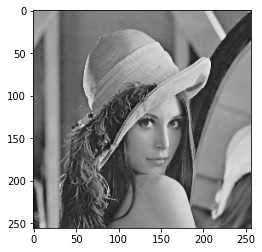

In [46]:
img = cv2.imread("./img.png", 0)
img.resize([256, 256])
imgplot = plt.imshow(img, cmap='gray')

4 different transforms(DFT, DCT, Walsh, Hadamard), followed by removing minimum 16 values and inverting back to original image and displaying it

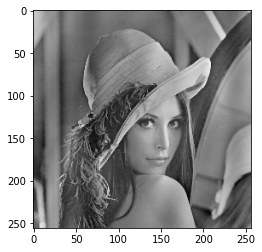

In [70]:
FT_img = np.dot(np.dot(fft1d, img), fft1d.transpose())
for x in range(16):
  FT_img[np.where(FT_img == FT_img.min())] = 0
IFT_img = np.dot(np.dot(ifft1d.transpose(), FT_img), ifft1d)/256 /256
imgplot = plt.imshow(np.abs(IFT_img), cmap='gray')

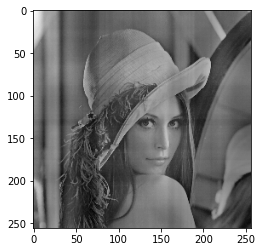

In [69]:
dct1d_basis = dct1d(256)
DCT_img = np.dot(np.dot(dct1d_basis, img), dct1d_basis.transpose())
for x in range(16):
  DCT_img[np.where(DCT_img == DCT_img.min())] = 0
IDCT_img = np.dot(np.dot(dct1d_basis.transpose(), DCT_img), dct1d_basis) / 256 * 2
imgplot = plt.imshow(np.abs(IDCT_img), cmap='gray')

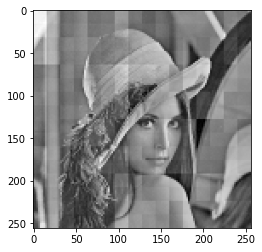

In [71]:
walsh1d_basis = walsh1d(256)
W_img = np.dot(np.dot(walsh1d_basis, img), walsh1d_basis.transpose())
for x in range(16):
  W_img[np.where(W_img == W_img.min())] = 0
IW_img = np.dot(np.dot(walsh1d_basis.transpose(), W_img), walsh1d_basis)/256 /256
imgplot = plt.imshow(np.abs(IW_img), cmap='gray')

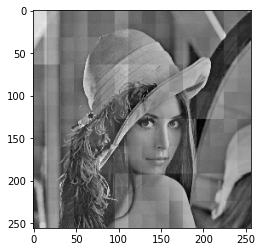

In [72]:
hadamard1d_basis = hadamard1d(256)
H_img = np.dot(np.dot(hadamard1d_basis, img), hadamard1d_basis.transpose())
for x in range(16):
  H_img[np.where(H_img == H_img.min())] = 0
IH_img = np.dot(np.dot(hadamard1d_basis.transpose(), H_img), hadamard1d_basis)/256 /256
imgplot = plt.imshow(np.abs(IH_img), cmap='gray')

Observation: Removing 16 minimum coefficients brought minute distortions to the image differing for the type of transform applied on the images
